<a href="https://colab.research.google.com/github/0ginny/TIL/blob/main/240502_lec48_learning_rate_codeChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

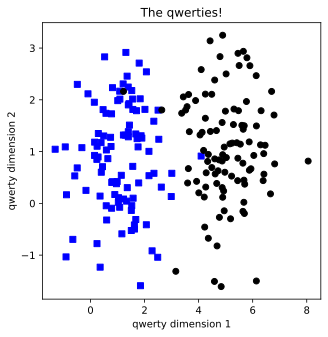

In [42]:
# data generation

a= [1,1]
b =[5,1]

blur = 1
N = 100

A = [a[0] +np.random.randn(N) * blur, a[1] +np.random.randn(N) * blur ]
B = [b[0] +np.random.randn(N) * blur, b[1] +np.random.randn(N) * blur ]

labels_np = np.vstack((np.zeros((N,1)),np.ones((N,1))))

data_np = np.hstack((A,B)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()
# print(data)

# show the data
fig = plt.figure(figsize=(5,5))
# plt.plot(data[:,0],data[:,1],'bs')
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [44]:
def gen_data(a,b,N,blur):
    A = [a[0] +np.random.randn(N) * blur, a[1] +np.random.randn(N) * blur ]
    B = [b[0] +np.random.randn(N) * blur, b[1] +np.random.randn(N) * blur ]

    labels_np = np.vstack((np.zeros((N,1)),np.ones((N,1))))

    data_np = np.hstack((A,B)).T

    data = torch.tensor(data_np).float()
    labels = torch.tensor(labels_np).float()

    return data, labels

In [43]:
def model_test_lr(x,y,learningRate):
    epochs = 500


    ann = nn.Sequential(
        nn.Linear(2,1),
        nn.ReLU(),
        nn.Linear(1,1),
        nn.Sigmoid() # if loss  = nn.BCEWithLogitsLoss() 이면 ,이 코드는 필요없어.
    )

    lossfun = nn.BCELoss()
    optimizer = torch.optim.Adam(ann.parameters(),lr = learningRate)


    losses = np.zeros(epochs)
    for epoch in range(epochs):
        yHat = ann(x)
        loss = lossfun(yHat,y)
        losses[epoch] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    prediction = ann(x)

    return prediction, losses


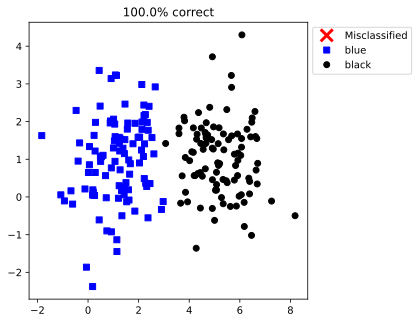

In [50]:
# 함수 확인
a= [1,1]
b =[5,1]

blur = 1
N = 100

data, labels = gen_data(a,b,N,blur)

In [ ]:
# 한번 실행 ok
predictions, losses = model_test_lr(data,labels,0.05)

predlabels = predictions > 0.5
# predlabels = predictions > 0.0 # if loss = BCEWithLogitsLoss

# find errors
misclassified = np.where(predlabels != labels)[0]
# total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()

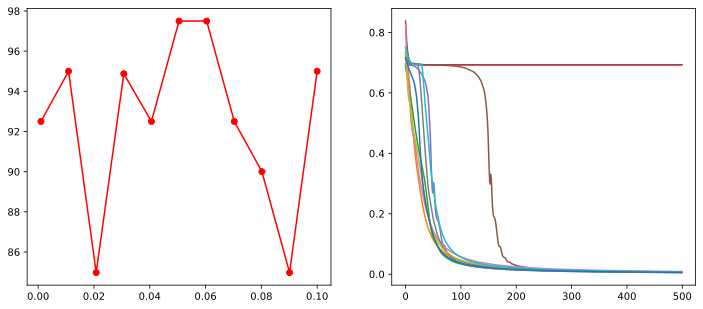

In [63]:
# learning rate, total acc graph

lrs = torch.linspace(0.001,0.1, 11)
num_exp = 20

all_losses= []
totals = []
for lr in lrs:
    temp_acc = []
    for n in range(num_exp):

        predictions, losses = model_test_lr(data,labels,0.05)

        predlabels = predictions > 0.5
        # find errors
        misclassified = np.where(predlabels != labels)[0]
        # total accuracy
        totalacc = 100-100*len(misclassified)/(2*N)

        temp_acc.append(totalacc)
            # print(temp_acc)
    totals.append(np.mean(temp_acc))
    all_losses.append(losses)

plt.figure(figsize = (12,5))
plt.subplot(121)
plt.plot(lrs,totals,'ro-')

plt.subplot(122)
plt.plot(np.array(all_losses).T)



1) The closeness of the qwerties groups is determined by the XY locations of the centroids, and by the blur parameter.
   Try increasing or decreasing the blur (e.g., to 2 or .5). How does this affect the number of times that the model
   successfully learned to categorize the two conditions?

2) The mean of a set of numbers is easily interpretable only if the data are roughly normally or uniformly distributed
   (see lecture "Mean and variance" in Math section). Do you think the mean is a valid description of the performance
   of the model's accuracy in the meta-experiment? Use a different metric (e.g., one we discussed in this video!) and
   plot that result on the same graph as the average. You might need to do some normalization to get them in the same
   range. Does this alternative method lead to a different conclusion?

3) Related to the previous comment, perhaps showing an image of the performance (variable accMeta) would be more
   appropriate. Create a heat map that shows learning rate on the x-axis, experiment repetitions on the y-axis, and
   the final accuracy in color. Label the axes and specify suitable color boundaries.
